In [53]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime
import time

In [54]:
#Loading the training data
data_train = pd.read_csv('train.csv')
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [55]:
data_train.shape

(14999, 9)

In [56]:
#Loading the test data
data_test = pd.read_csv('test.csv')
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [57]:
data_test.shape

(8764, 8)

In [58]:
#Clening the data i.e removing 'F' character from the train and test data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [59]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


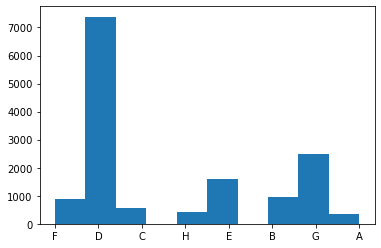

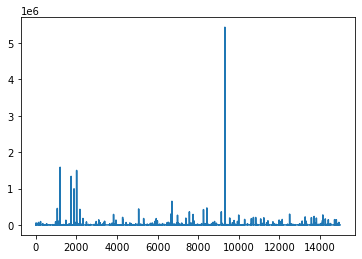

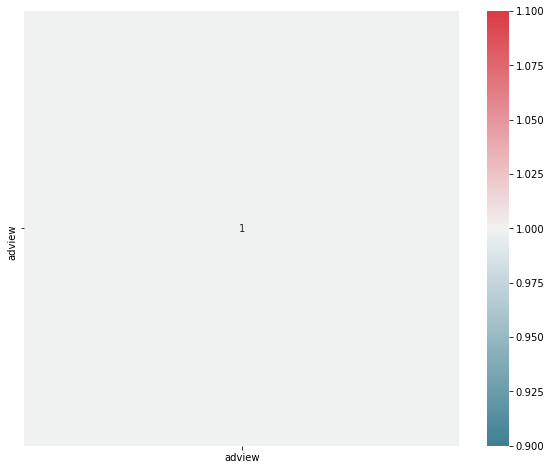

In [60]:
#Visulization before data processing
#individual plots
plt.hist(data_train["category"])
plt.show()

plt.plot(data_train["adview"])
plt.show()

f, ax = plt.subplots(figsize= (10,8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=bool), cmap =sns.diverging_palette(220,10, as_cmap= True),square = True, ax = ax, annot = True)
plt.show()

In [61]:
#Assigning each category a number of feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [62]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [63]:
#Converting values into integers for views, likes, dislikes etc.
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [64]:
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid1=data_test['vidid']

In [65]:
#Encoding features such as Category, vidid and Duration
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [66]:
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


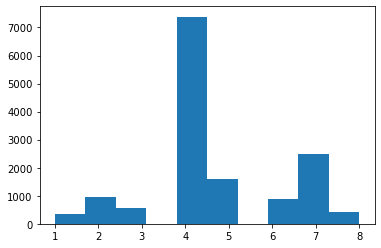

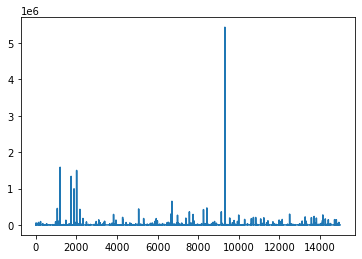

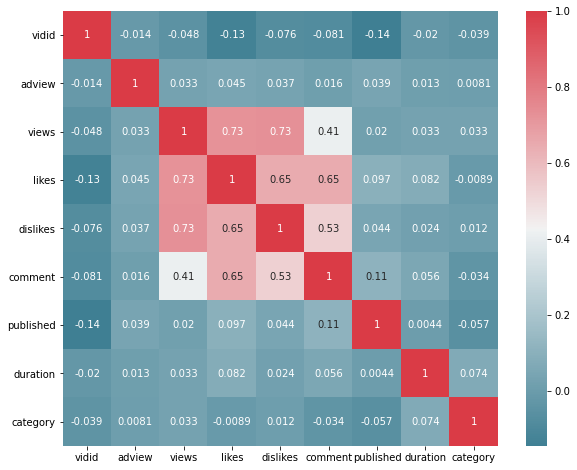

In [67]:
#Visulization after data processing
#individual plots
plt.hist(data_train["category"])
plt.show()

plt.plot(data_train["adview"])
plt.show()

f, ax = plt.subplots(figsize= (10,8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=bool), cmap =sns.diverging_palette(220,10, as_cmap= True),square = True, ax = ax, annot = True)
plt.show()

In [52]:
#Converting time in sec for duration
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+= i
        else:
            if(i == "H"):
                h = mm
                mm = ''
            elif(i == "M") :
                m = mm;
                mm = ''
            else:
                s = mm
                mm = ''
    if(h == ''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s == ''):
        s = '00'
    bp = h+':'+m+':'+s
    return bp
train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")['duration']
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h)* 3600 + int(m)* 60 + int(s)

time_new = time.apply(func_sec)
data_train["duration"] = time_new

data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [68]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+= i
        else:
            if(i == "H"):
                h = mm
                mm = ''
            elif(i == "M") :
                m = mm;
                mm = ''
            else:
                s = mm
                mm = ''
    if(h == ''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s == ''):
        s = '00'
    bp = h+':'+m+':'+s
    return bp
test = pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")['duration']
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h)* 3600 + int(m)* 60 + int(s)

time_new = time.apply(func_sec)
data_test["duration"] = time_new

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [69]:
#Splitting the data into train and test
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
test_y = pd.DataFrame(data_test.iloc[:, 0].values, columns=['vidid'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_test = data_test.drop(['vidid'], axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,2925,6
1,1707,56,2,6,2185,3040,4
2,2023,25,0,2,2094,1863,3
3,620860,777,161,153,2119,2546,8
4,666,1,0,0,2091,1963,4


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, train_size = 0.8, random_state = 42)
X_train.shape

(11709, 7)

In [71]:
#Normalizing the data using MaxMin
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
data_test = scaler.transform(data_test)
X_train.mean()

0.25583174881891707

In [72]:
#Defining Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [73]:
#Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test,linear_regression)

Mean Absolute Error: 5288.146964612729
Mean Squared Error: 10881576714.292877
Root Mean Squared Error: 104314.7962385628


In [74]:
#Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,supportvector_regressor)

C:\Users\Vikram\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3478.055764043397
Mean Squared Error: 10901273757.728346
Root Mean Squared Error: 104409.16510406711


In [75]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 4111.869193989071
Mean Squared Error: 10866885157.2681
Root Mean Squared Error: 104244.35311933256


In [76]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth
                                      , min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

<ipython-input-76-1fdea4bcb5a4>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 4924.838358071907
Mean Squared Error: 10369189856.661127
Root Mean Squared Error: 101829.21907125246


In [77]:
#Artificial Neural Networks
import keras
import tensorflow as tf
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer = tf.keras.optimizers.Adam()
loss = keras.losses.mean_absolute_error
ann.compile(optimizer= optimizer, loss = loss, metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 857us/step - loss: 1711.7202 - mean_squared_error: 767614528.0000
Epoch 2/100
366/366 [==============================] - 0s 923us/step - loss: 1711.5038 - mean_squared_error: 767612416.0000
Epoch 3/100
366/366 [==============================] - 0s 941us/step - loss: 1711.4915 - mean_squared_error: 767612736.0000
Epoch 4/100
366/366 [==============================] - 0s 925us/step - loss: 1711.4801 - mean_squared_error: 767612736.0000
Epoch 5/100
366/366 [==============================] - 0s 870us/step - loss: 1711.4678 - mean_squared_error: 767612416.0000
Epoch 6/100
366/366 [==============================] - 0s 851us/step - loss: 1711.4528 - mean_squared_error: 767612352.0000
Epoch 7/100
366/366 [==============================] - 0s 849us/step - loss: 1711.4348 - mean_squared_error: 767612096.0000
Epoch 8/100
366/366 [==============================] - 0s 908us/step - loss: 1711.4164 - mean_squared_error: 767611712.0000
Epoch 9/

366/366 [==============================] - 0s 840us/step - loss: 1711.2419 - mean_squared_error: 767606144.0000
Epoch 67/100
366/366 [==============================] - 0s 858us/step - loss: 1711.2411 - mean_squared_error: 767606272.0000
Epoch 68/100
366/366 [==============================] - 0s 838us/step - loss: 1711.2386 - mean_squared_error: 767606464.0000
Epoch 69/100
366/366 [==============================] - 0s 842us/step - loss: 1711.2389 - mean_squared_error: 767606528.0000
Epoch 70/100
366/366 [==============================] - 0s 873us/step - loss: 1711.2385 - mean_squared_error: 767606528.0000
Epoch 71/100
366/366 [==============================] - 0s 840us/step - loss: 1711.2385 - mean_squared_error: 767606016.0000
Epoch 72/100
366/366 [==============================] - 0s 845us/step - loss: 1711.2338 - mean_squared_error: 767607232.0000
Epoch 73/100
366/366 [==============================] - 0s 861us/step - loss: 1711.2327 - mean_squared_error: 767606464.0000
Epoch 74/100


In [78]:
#Saving RandomTreeModel and Keras ANN model
import joblib
joblib.dump(random_forest,"random_forestregressor_youtubeadview.pkl")

ann.save("ann_youtubeadview.h5")

In [79]:
#Loading model and predicting
randomforest_model = joblib.load("random_forestregressor_youtubeadview.pkl")
predict = randomforest_model.predict(data_test)
predict

array([1773.54026096, 1728.68098252,  284.20286059, ...,   18.43072971,
         20.30081947, 2489.03256238])

In [80]:
predictions = pd.DataFrame(predict, columns=['adview']).to_csv('predictions.csv')

In [83]:
print(predictions)


None


In [84]:
print(predict)

[1773.54026096 1728.68098252  284.20286059 ...   18.43072971   20.30081947
 2489.03256238]
